# Text Classification using Multinomial Naive Bayes Algorithm

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [1]:
# Downloading and describing the dataset
from sklearn.datasets import fetch_20newsgroups
text_data= fetch_20newsgroups()

In [5]:
print("Keys : \n{}".format(text_data.keys()))
text_data.target_names

Keys : 
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
text_data.data[:1]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]

In [13]:
#We will select just a few of these categories, and download the training and testing set:
categories= ['sci.electronics', 'comp.windows.x', 'sci.space','rec.sport.hockey','rec.motorcycles','rec.sport.baseball']
train = fetch_20newsgroups(subset='train',categories= categories)
test = fetch_20newsgroups(subset='test',categories=categories)
print(train.data[10])
print(test.data[10])

From: kenh@sail.LABS.TEK.COM (Ken Hillen)
Subject: RF data transmission
Article-I.D.: sail.13601
Distribution: usa
Organization: Tektronix Inc., Beaverton, Or.
Lines: 10

I need a off-the-shelf method of transmitting small amounts of data up to
300 feet.  The data is low speed and can be encoded as needed.  Low power
on the transmitting end would be a plus.  An FCC certified product would
be prefered.

If you have any pointers to products or companies I'd appreciate hearing from
you.

Thanks,
Ken

From: pyron@skndiv.dseg.ti.com (Dillon Pyron)
Subject: Re: What planets are habitable
Lines: 32
Nntp-Posting-Host: skndiv.dseg.ti.com
Reply-To: pyron@skndiv.dseg.ti.com
Organization: TI/DSEG VAX Support


In article <C6Az8z.pD@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry Spencer) writes:
>In article <1rpt1v$q5h@hsc.usc.edu> khayash@hsc.usc.edu (Ken Hayashida) writes:
>>As for human tolerances, the best example of human endurance in terms
>>of altitude (i.e. low atmospheric pressure and lowe

### In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(train.data,train.target)
labels=model.predict(test.data)

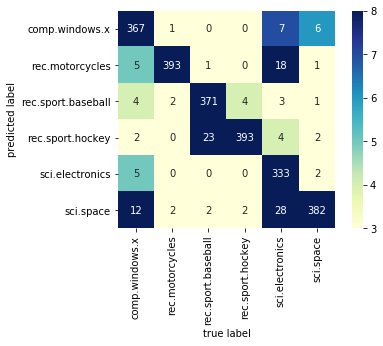

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### It can be seen that the classifier has worked properly except for baseball and hockey as both fall in the same category that is sports

# Lets try to predict a class of random text

In [18]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [38]:
predict_category("glove")

'rec.sport.baseball'

In [43]:
predict_category("I love to code")

'comp.windows.x'